# Домашнее задание к лекции «Регулярные выражения и основы синтаксического разбора»
13.04.2020

## Задание 1.
Напишите функцию, которая принимает на вход строку и проверяет является ли она валидным транспортным номером. Если да, то функция должна возвращать отдельно номер и регион.

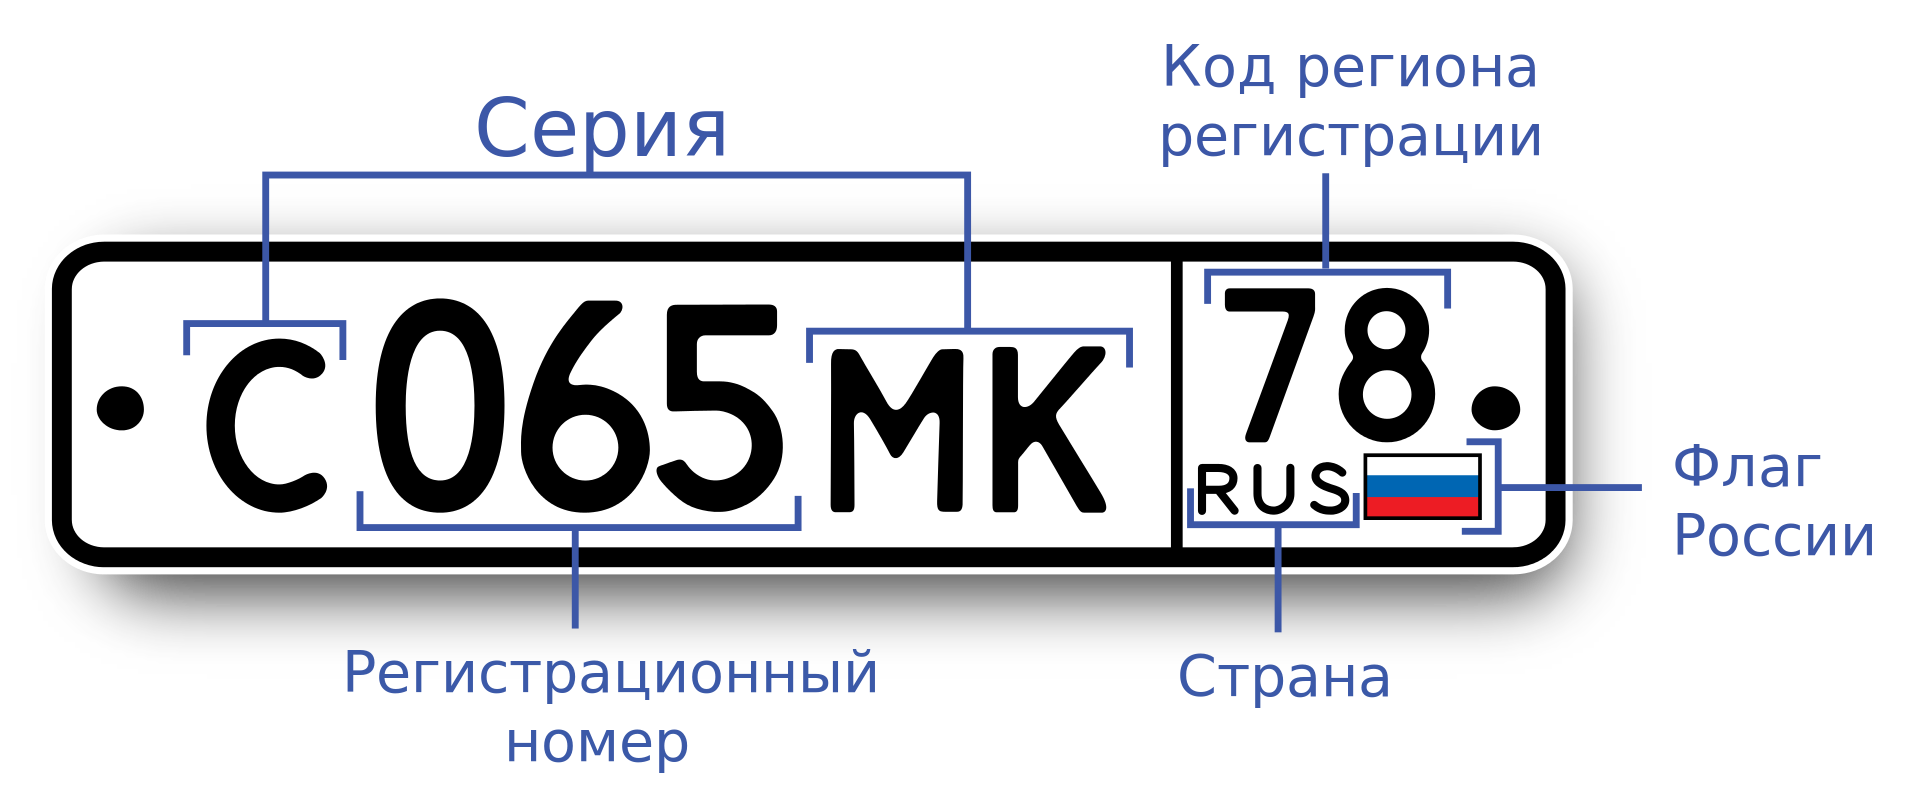
Тип 1 — Регистрационные знаки легковых, грузовых автомобилей и автобусов (кроме отнесённых к типу 1Б).

In [53]:
import re
def transport_number(number_str):
    """
    Функция проверяет, является ли строка на входе валидным рег. знаком (транспортным номером) 
    легковых, грузовых автомобилей и автобусов (группа 1, тип 1 и 1а в соотв. с  ГОСТ Р 50577-2018)        
    Возвращает кортеж: 
    - номер (серия+номер), код региона
    - False - если номер некорректен
    """    
#     number = re.findall(r'([АВЕКМНОРСТУХ]\d{3}[АВЕКМНОРСТУХ]{2})(\d{2,3})', number_str)   
    number = re.match(r'([АВЕКМНОРСТУХ]\d{3}[АВЕКМНОРСТУХ]{2})(\d{2,3})', number_str)   
#     print(number)
    if number and (number_str == number.group(0) ): # номер определен и в строне нет ничего лишнего
        return number.group(1), number.group(2)
    else:
        return False

In [52]:
print(transport_number('М152ТВ174'))
print(transport_number('М152ТВ'))
print(transport_number('М152ТВ174 М152ТВ174'))

('М152ТВ', '174')
False
False


## Задание 2.
Постарайтесь написать (в крайнем случае найти) самый полный шаблон для проверки e-mail адресов через регулярное выражение, которая проверяет e-mail адрес на валидность. Можно руководствоваться следующими минимальными требованиями:

- +адрес должен содержать специальный символ “@”, который отделяет имя пользователя почтовой системы от доменного имени;
- +адрес не должен содержать следующие символы: “пробел”, “,”, “:”, “;”, “!”, “#”, “%”, “*”, “(”, “)”, “=”, “+”, “{”, “}”, " " ", " ’ ", " / ", " \ " и “|”;
- + адрес должен состоять только из латинских символов;
- + после символа “@” должна быть как минимум одна “.”;
- +после последней точки должно быть не менее 2-х и не более 4-х символов, причем наличие цифр не допускается;
- +между последней точкой и символом “@” должно быть не менее 2-х символов
- +слева от “@” должно быть не менее четырех символов

In [150]:
def check_email(email):
    if re.findall(r'[\s^\,:;!#%,*()=+{}"’/\|]', email):
        print(f'"{email}" - False')
        return False

    email = email.lower()

#     pattern = r'([a-z.]+)(@)([a-z.]+)(\.[a-z]{2,4})$'
#     pattern = r'([a-z]+?)([a-z.]+)(?<!\.\w)(@)([a-z.]+)(\.[a-z]{2,4})$'    
#     pattern = r'(^[a-z]+?)([a-z.]+)(?<!\.\w)(?<=.{4})(@)([a-z.]+)(\.[a-z]{2,4})$'    # мой вариант    
    pattern = r'^([a-z])([a-z.]+)(?<!\.\w)(?<=.{4})(@)([a-z.]+)(\.[a-z]{2,4})$'    # мой вариант        
    
    parts = re.findall(pattern, email)
    if parts:    
        print(f'"{email}"  =  {parts}')
        return True        
    print(f'"{email}" - False')
    return False
    

check_email('john@mail.ru')
check_email('john@company.mail.ru')
check_email('jo.hn@mail.ru')         # 

check_email('john.mail')             # без @
check_email('john doe@mail.mail.ru') # спецсимволы
check_email('john=doe@mail.mail.ru') # спецсимволы
check_email('адрес@домен.ru')        # не латинские буквы
check_email('john@mail')             # без . после @
check_email('john@mail.manychar')    # много после @ и последней .
check_email('joh.n@mail.ru')         # лишь один символ после . перед @
check_email('n@mail.ru')             # мало перед @
check_email('hn@mail.ru')            # мало перед @
check_email('ohn@mail.ru')           # мало перед @


"john@mail.ru"  =  [('j', 'ohn', '@', 'mail', '.ru')]
"john@company.mail.ru"  =  [('j', 'ohn', '@', 'company.mail', '.ru')]
"jo.hn@mail.ru"  =  [('j', 'o.hn', '@', 'mail', '.ru')]
"john.mail" - False
"john doe@mail.mail.ru" - False
"john=doe@mail.mail.ru" - False
"адрес@домен.ru" - False
"john@mail" - False
"john@mail.manychar" - False
"joh.n@mail.ru" - False
"n@mail.ru" - False
"hn@mail.ru" - False
"ohn@mail.ru" - False


False

## Задание 3. 
Напишите функцию, которая будет удалять все последовательные повторы слов из заданной строки при помощи регулярных выражений.

In [160]:
def del_repeat(string):
#     new_string = re.findall(r'(\b\w+\b)\s\1', string)
    new_string = re.sub(r'(\b\w+\b)\s\1', r'\1', string)
    while new_string != string:
        string = str(new_string)
        new_string = re.sub(r'(\b\w+\b)\s\1', r'\1', string)
    return new_string
    
    
del_repeat("Напишите функцию функцию, которая будет будет удалять все все все последовательные повторы слов слов слов слов слов слов из заданной строки при помощи регулярных выражений.")


'Напишите функцию, которая будет удалять все последовательные повторы слов из заданной строки при помощи регулярных выражений.'

## Задание 4.
Напишите функцию, которая будет проверять номер сотового телефона на валидность, если он валиден, то переводить его в формат:
+7(xxx)-xxx-xx-xx

Постарайтесь предусмотреть как можно больше адекватных форматов изначального ввода номера. Примеры валидных форматов:

• +7 955 555-55-55;
• 9555555555;
• 8(955)555-55-55;
• +7 955 555 55 55;
• 7(955) 555-55-55;
• +7 955+555+55+55.

In [179]:
def valid_phone_number(phone_number):
    phone_number = re.sub(r'\D', r'', phone_number) # убрать все не цифры
    phone_number = re.findall(r'^([78])?(\d{3})(\d{3})(\d{2})(\d{2})$', phone_number) # разбить на блоки цифр
    if phone_number:                
        phone_number = phone_number[0]
        phone_number = f'+7({phone_number[1]})-{phone_number[2]}-{phone_number[3]}-{phone_number[4]}'
        return phone_number
    return False

num = ['+7 955 555-55-55', '9555555555', '8(955)555-55-55', '+7 955 555 55 55', '7(955) 555-55-55', '+7 955+555+55+55',
      'asas','12345']
for n in num:
    print(n, ' = ', valid_phone_number(n))

+7 955 555-55-55  =  +7(955)-555-55-55
9555555555  =  +7(955)-555-55-55
8(955)555-55-55  =  +7(955)-555-55-55
+7 955 555 55 55  =  +7(955)-555-55-55
7(955) 555-55-55  =  +7(955)-555-55-55
+7 955+555+55+55  =  +7(955)-555-55-55
asas  =  False
12345  =  False
